In [2]:
#work on making this work
import pandas as pd
import numpy as np
from Bio import SeqIO
strains = []
genomes = []
for record in SeqIO.parse('C:/Users/srava/BedfordProjects/zika/results/aligned.fasta', "fasta"):
    strains.append(str(record.id))
    genomes.append(str(record.seq))

In [3]:
len(strains)

519

In [4]:
strains[:5]

['DOM/2016/MA_WGS16_024',
 'DOM/2016/BB_0180',
 'DOM/2016/BB_0115',
 'DOM/2016/BB_0208',
 'DOM/2016/MA_WGS16_007']

In [5]:
# Return the Hamming distance between string1 and string2.
# string1 and string2 should be the same length.
def hamming_distance(array1, array2): 
    # Start with a distance of zero, and count up
    distance = 0
    # Loop over the indices of the string
    L = len(array1)
    for i in range(L):
        # Add 1 to the distance if these two characters are not equal
        if array1[i] != array2[i] and array1[i] != 'N' and array2[i] != 'N':
            distance += 8
    # Return the final count of differences
    return distance

In [6]:
string1 = "AGTNNNNNNNNNNNNNNNTCGAT"
string2 = "GNNNNAGUGNNNNNNNNAGUTUN"
def hamming_distance2(array1, array2):
    array1 = np.frombuffer(array1.encode(),dtype="S1")
    array2 = np.frombuffer(array2.encode(),dtype="S1")
    indices = np.where((array1 != "N")&(array2 != 'N'))
    print(indices)
    return (array1 != array2).sum()
hamming_distance2(string1,string2)

(array([0], dtype=int64),)


13

In [7]:
#Using the Hamming distance to create a similarity matrix
numbers = []
matrixOfNum = []
for i in range(0, len(genomes)):
    for j in range(0,len(genomes)):
        num = hamming_distance(genomes[i],genomes[j])
        numbers.append(num)
    matrixOfNum.append(numbers)
    numbers = []
dataa = pd.DataFrame(matrixOfNum, columns = ["strain " + str(i) for i in range(1,len(matrixOfNum) + 1)], dtype="float")
print(dataa.head())

   strain 1  strain 2  strain 3  strain 4  strain 5  strain 6  strain 7  \
0       0.0      96.0     120.0     112.0     152.0     104.0      96.0   
1      96.0       0.0     120.0     112.0     144.0     104.0      88.0   
2     120.0     120.0       0.0     136.0     168.0     128.0     112.0   
3     112.0     112.0     136.0       0.0      64.0     120.0     104.0   
4     152.0     144.0     168.0      64.0       0.0     160.0     152.0   

   strain 8  strain 9  strain 10  ...  strain 510  strain 511  strain 512  \
0     104.0     104.0      144.0  ...       320.0       280.0       240.0   
1      96.0      96.0      152.0  ...       304.0       272.0       240.0   
2     120.0     120.0      176.0  ...       352.0       288.0       256.0   
3      96.0     112.0      168.0  ...       344.0       296.0       256.0   
4     144.0     160.0      216.0  ...       344.0       328.0       272.0   

   strain 513  strain 514  strain 515  strain 516  strain 517  strain 518  \
0       2

In [8]:
import seaborn as sns
print(sns.heatmap(dataa))


AxesSubplot(0.125,0.11;0.62x0.77)


In [9]:
from sklearn.manifold import MDS
embedding = MDS(n_components=10,metric=True,dissimilarity='precomputed')
X_transformed = embedding.fit_transform(dataa)

In [10]:
MDS_df = pd.DataFrame(X_transformed,columns=['cluster ' + str(i) for i in range(1,11)])
print(MDS_df.head())

    cluster 1   cluster 2  cluster 3  cluster 4  cluster 5   cluster 6  \
0 -182.852774 -101.025318  59.588908  -7.101194 -54.532571   62.062352   
1 -164.023615  -88.853722  82.962082 -12.950029 -35.626793   61.450307   
2 -152.779835 -131.892748  88.605128 -11.857819 -47.182103   66.765047   
3 -194.807895 -109.050869  76.073842 -24.581980 -45.325210   67.191528   
4 -170.875107 -154.658582  93.330884   2.019500 -56.716446  105.126289   

    cluster 7  cluster 8  cluster 9  cluster 10  
0  -71.139406 -56.908248 -33.436744    7.410974  
1  -61.516687 -25.307913 -54.965695   16.539116  
2 -105.667562 -83.611912 -57.364505   -6.364457  
3  -54.855912 -67.928247 -36.451202   47.059936  
4  -72.022896 -94.886787 -81.371260   20.915790  


In [11]:
#merging my final dataframe with their regions and strain names
import pandas as pd
metadata_df = pd.read_csv(r'C:\Users\srava\BedfordProjects\zika\results\metadata.tsv', delimiter='\t')

In [12]:
metadata_df.head()

,strain,virus,accession,date,region,country,division,city,db,segment,authors,url,title,journal,paper_url
0,1_0015_PF,zika,KX447511,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447511,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
1,1_0016_PF,zika,KX447520,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447520,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
2,1_0030_PF,zika,KX447515,2013-11-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447515,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
3,1_0035_PF,zika,KX447514,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447514,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
4,1_0038_PF,zika,KX447517,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447517,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507


In [13]:
strains_df = pd.DataFrame(strains)
strains_df.columns = ['strain']

In [14]:
result_strains = pd.merge(strains_df,metadata_df, on='strain')

In [15]:
finalDf = pd.concat([MDS_df, result_strains[['region','country','strain']]], axis = 1)

In [16]:
finalDf.head()

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,cluster 10,region,country,strain
0,-182.852774,-101.025318,59.588908,-7.101194,-54.532571,62.062352,-71.139406,-56.908248,-33.436744,7.410974,north_america,dominican_republic,DOM/2016/MA_WGS16_024
1,-164.023615,-88.853722,82.962082,-12.950029,-35.626793,61.450307,-61.516687,-25.307913,-54.965695,16.539116,north_america,dominican_republic,DOM/2016/BB_0180
2,-152.779835,-131.892748,88.605128,-11.857819,-47.182103,66.765047,-105.667562,-83.611912,-57.364505,-6.364457,north_america,dominican_republic,DOM/2016/BB_0115
3,-194.807895,-109.050869,76.073842,-24.581980,-45.325210,67.191528,-54.855912,-67.928247,-36.451202,47.059936,north_america,dominican_republic,DOM/2016/BB_0208
4,-170.875107,-154.658582,93.330884,2.019500,-56.716446,105.126289,-72.022896,-94.886787,-81.371260,20.915790,north_america,dominican_republic,DOM/2016/MA_WGS16_007


In [17]:
import altair as alt
from augur.utils import json_to_tree
import json
import pandas as pd

In [18]:
# Import modules
with open('Data/zika_tree.json') as fh:
    json_tree_handle = json.load(fh)
#json_tree_handle = json.loads(requests.get("http://data.nextstrain.org/zika_tree.json").text)
# Download tree JSON file used by auspice. Despite its filename extension, the data are compressed.
#http = urllib3.PoolManager()
# = http.request('GET', "")


In [19]:
tree = json_to_tree(json_tree_handle)

In [20]:
tree

Clade(branch_length=0, clade=940, name='NODE_0000520', numdate=2007.1438944876675, strain='NODE_0000520', yvalue=510.91459311393555)

In [21]:
node_data = [
    {
        "strain": node.name,
        "date": node.attr["num_date"],
        "y": node.yvalue,
        "region": node.attr["region"],
        "country": node.attr["country"],
        "parent_date": node.parent is not None and node.parent.attr["num_date"] or node.attr["num_date"],
        "parent_y": node.parent is not None and node.parent.yvalue or node.yvalue
    }
    for node in tree.find_clades(terminal=True)
]

In [22]:
node_data[10]

{'strain': 'V20366',
 'date': 2018.7748117727583,
 'y': 507,
 'region': 'south_asia',
 'country': 'india',
 'parent_date': 2018.510007605652,
 'parent_y': 507.5}

In [23]:
node_df = pd.DataFrame(node_data)

In [24]:
node_df.head()

,country,date,parent_date,parent_y,region,strain,y
0,thailand,2013.136893,2010.921473,516.50,southeast_asia,THA/PLCal_ZV/2013,517
1,thailand,2016.665298,2010.921473,516.50,southeast_asia,SI_BKK01,516
2,thailand,2015.043806,2010.006479,514.25,southeast_asia,SV0010/15,515
3,thailand,2016.919918,2011.367398,513.50,southeast_asia,DMSc05684_16,514
4,thailand,2013.722793,2011.367398,513.50,southeast_asia,SK403/13AS,513


In [25]:
node_df["y"] = node_df["y"].max() - node_df["y"]

In [26]:
node_df["parent_y"] = node_df["parent_y"].max() - node_df["parent_y"]

In [27]:
node_df.shape

(517, 7)

In [28]:
node_df.head()

,country,date,parent_date,parent_y,region,strain,y
0,thailand,2013.136893,2010.921473,0.00,southeast_asia,THA/PLCal_ZV/2013,0
1,thailand,2016.665298,2010.921473,0.00,southeast_asia,SI_BKK01,1
2,thailand,2015.043806,2010.006479,2.25,southeast_asia,SV0010/15,2
3,thailand,2016.919918,2011.367398,3.00,southeast_asia,DMSc05684_16,3
4,thailand,2013.722793,2011.367398,3.00,southeast_asia,SK403/13AS,4


In [29]:
node_df["region"].unique()

array(['southeast_asia', 'south_asia', 'oceania', 'china',
       'north_america', 'south_america', 'japan_korea'], dtype=object)

In [30]:
finalDf["region"].unique()

array(['north_america', 'japan_korea', 'south_america', 'oceania',
       'china', 'southeast_asia', 'south_asia'], dtype=object)

In [31]:
merged_df = pd.merge(finalDf,node_df,on=["strain","region"]).dropna()

In [32]:
merged_df.head()

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,cluster 10,region,country_x,strain,country_y,date,parent_date,parent_y,y
0,-182.852774,-101.025318,59.588908,-7.101194,-54.532571,62.062352,-71.139406,-56.908248,-33.436744,7.410974,north_america,dominican_republic,DOM/2016/MA_WGS16_024,dominican_republic,2016.517454,2016.177960,202.0,202
1,-164.023615,-88.853722,82.962082,-12.950029,-35.626793,61.450307,-61.516687,-25.307913,-54.965695,16.539116,north_america,dominican_republic,DOM/2016/BB_0180,dominican_republic,2016.298426,2015.782991,188.0,188
2,-152.779835,-131.892748,88.605128,-11.857819,-47.182103,66.765047,-105.667562,-83.611912,-57.364505,-6.364457,north_america,dominican_republic,DOM/2016/BB_0115,dominican_republic,2016.279261,2015.738263,171.5,172
3,-194.807895,-109.050869,76.073842,-24.581980,-45.325210,67.191528,-54.855912,-67.928247,-36.451202,47.059936,north_america,dominican_republic,DOM/2016/BB_0208,dominican_republic,2016.303901,2016.145963,205.0,205
4,-170.875107,-154.658582,93.330884,2.019500,-56.716446,105.126289,-72.022896,-94.886787,-81.371260,20.915790,north_america,dominican_republic,DOM/2016/MA_WGS16_007,dominican_republic,2016.358658,2016.145963,205.0,206


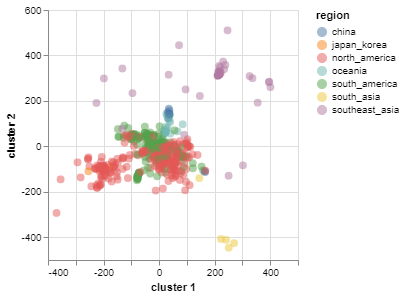

In [33]:
import altair as alt

base = alt.Chart(merged_df)
base.mark_circle(size=60).encode(
    x='cluster 1',
    y='cluster 2',
    opacity=alt.value(0.5),
    color='region',
    tooltip=['strain', 'region']
).properties(width=250,height=250).interactive()


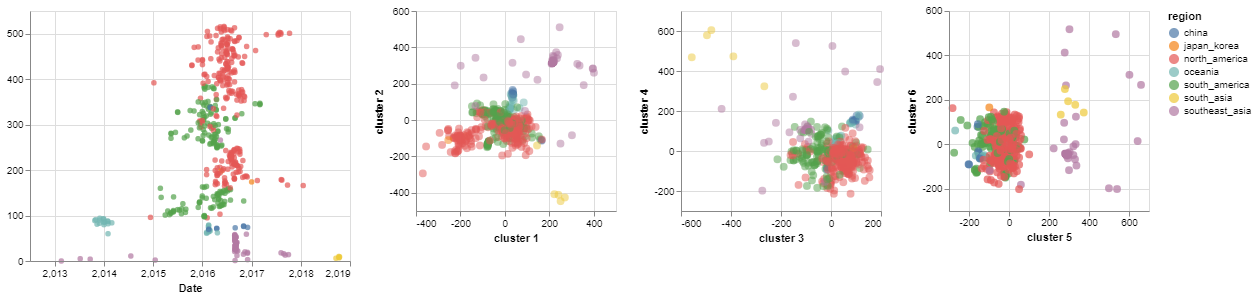

In [34]:
import altair as alt

brush = alt.selection(type='interval', resolve='global')
base = alt.Chart(merged_df)
MDS1 = base.mark_circle(size=60).encode(
    x='cluster 1',
    y='cluster 2',
    opacity=alt.value(0.5),
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(brush).properties(width=200,height=200)

MDS2 = base.mark_circle(size=60).encode(
    x='cluster 3',
    y='cluster 4',
    opacity=alt.value(0.5),
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(brush).properties(width=200,height=200)

MDS3 = base.mark_circle(size=60).encode(
    x='cluster 5',
    y='cluster 6',
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(
    brush
).properties(
    width=200,
    height=200
)
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)
tree_name = base.mark_circle().encode(
    x=alt.X(
        "date:Q",
        scale=alt.Scale(domain=(node_df["date"].min() - 0.2, node_df["date"].max() + 0.2)),
        title="Date"
    ),
    y=alt.Y(
        "y:Q",
        title=""
    ),
    color=alt.condition(brush, 'region:N', alt.ColorValue('gray')),
    #color="region:N",
    tooltip=["strain:N", "region:N", "date:Q"]
).add_selection(brush).properties(width=320,height=250)
#make region clickable
notChart = tree_name|MDS1|MDS2|MDS3
notChart
#pc1.encode(x='principal component 1') | pc34.encode(x='principal component 3') #link the tree to this one as well
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)

In [35]:
notChart.save('index.html')